<a href="https://colab.research.google.com/github/priteshgudge/image_background_commercial/blob/main/Image%20Background_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Preparation

In [ ]:
import os

# clone the repository
%cd /content
if not os.path.exists('MODNet'):
  !git clone https://github.com/ZHKKKe/MODNet
%cd MODNet/

# dowload the pre-trained ckpt for image matting
pretrained_ckpt = 'pretrained/modnet_photographic_portrait_matting.ckpt'
if not os.path.exists(pretrained_ckpt):
  !gdown --id 1mcr7ALciuAsHCpLnrtG_eop5-EYhbCmz \
          -O pretrained/modnet_photographic_portrait_matting.ckpt

/content
Cloning into 'MODNet'...
remote: Enumerating objects: 270, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 270 (delta 31), reused 30 (delta 11), pack-reused 206
Receiving objects: 100% (270/270), 60.77 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (92/92), done.
/content/MODNet
Downloading...
From: https://drive.google.com/uc?id=1mcr7ALciuAsHCpLnrtG_eop5-EYhbCmz
To: /content/MODNet/pretrained/modnet_photographic_portrait_matting.ckpt
100% 26.3M/26.3M [00:00<00:00, 184MB/s]


## 2. Upload Images

<p align="justify">Upload portrait images to be processed (only PNG and JPG format are supported):</p>

In [ ]:
import shutil
import os
from google.colab import files

# clean and rebuild the image folders
# input_folder = 'demo/input'
# if os.path.exists(input_folder):
#   shutil.rmtree(input_folder)
# os.makedirs(input_folder)

# output_folder = 'demo/output'

# if os.path.exists(output_folder):
#   shutil.rmtree(output_folder)
# os.makedirs(output_folder)

# # upload images (PNG or JPG)
# image_names = list(files.upload().keys())
# for image_name in image_names:
#   shutil.move(image_name, os.path.join(input_folder, image_name))


input_folder = 'demo/input'
if not os.path.exists(input_folder):
  os.makedirs(input_folder)

matte_folder = 'demo/matte'
if not os.path.exists(matte_folder):
  os.makedirs(matte_folder)

output_folder = 'demo/output'
if not os.path.exists(output_folder):
  os.makedirs(output_folder)

## 3. Inference

<p align="justify">Run the following command for alpha matte prediction:</p>

In [ ]:

!python -m demo.image_matting.colab.inference \
        --input-path demo/input \
        --output-path demo/matte \
        --ckpt-path ./pretrained/modnet_photographic_portrait_matting.ckpt


Process image: pexels-j-u-n-e-1767434.jpeg
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
Process image: pexels-marina-shatskih-1227427.jpeg
Process image: pexels-cottonbro-6157229.jpeg


## 4. Visualization

<p align="justify">Display the results (from left to right: image, foreground, and alpha matte):</p>

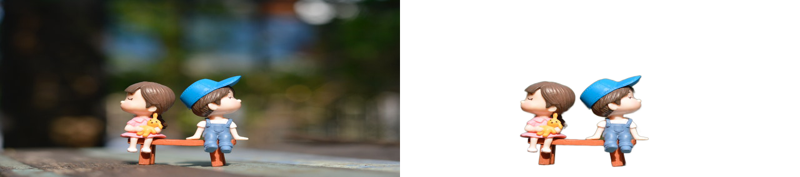

pexels-j-u-n-e-1767434.jpeg 



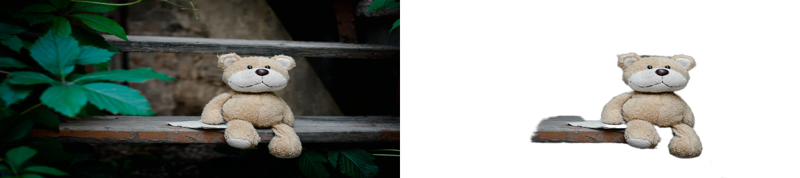

pexels-marina-shatskih-1227427.jpeg 



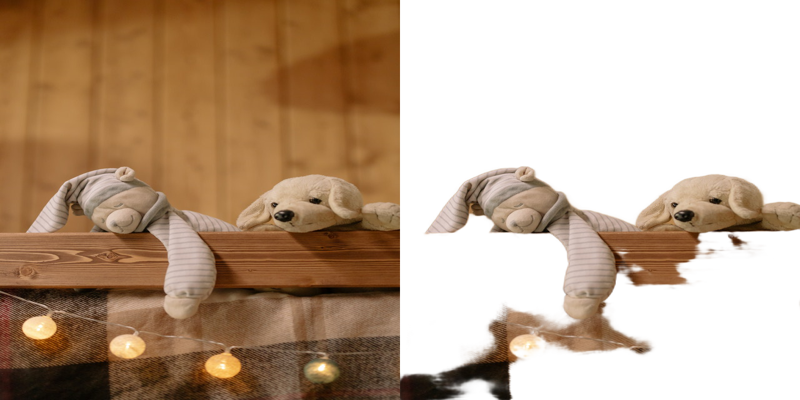

pexels-cottonbro-6157229.jpeg 



In [ ]:
import numpy as np
from PIL import Image

def combined_display(image, matte):
  # calculate display resolution
  w, h = image.width, image.height
  rw, rh = 800, int(h * 800 / (3 * w))
  
  
  # obtain predicted foreground
  image = np.asarray(image)
  if len(image.shape) == 2:
    image = image[:, :, None]
  if image.shape[2] == 1:
    image = np.repeat(image, 3, axis=2)
  elif image.shape[2] == 4:
    image = image[:, :, 0:3]
  matte = np.repeat(np.asarray(matte)[:, :, None], 3, axis=2) / 255
  foreground = image * matte + np.full(image.shape, 255) * (1 - matte)

  # combine image, foreground, and alpha into one line
  combined = np.concatenate((image, foreground), axis=1)
  combined = Image.fromarray(np.uint8(combined)).resize((rw, rh))
  return combined, foreground

#save output images
image_names = os.listdir(input_folder)
for image_name in image_names:
  matte_name = image_name.split('.')[0] + '.png'
  image = Image.open(os.path.join(input_folder, image_name))
  matte = Image.open(os.path.join(matte_folder, matte_name))
  combined, foreground = combined_display(image, matte)
  img = Image.fromarray(np.uint8(foreground))
  img.save(os.path.join(output_folder,image_name.split('.')[0] + '_output.png'))
  

# visualize all images
image_names = os.listdir(input_folder)
for image_name in image_names:
  matte_name = image_name.split('.')[0] + '.png'
  image = Image.open(os.path.join(input_folder, image_name))
  matte = Image.open(os.path.join(matte_folder, matte_name))
  combined, foreground = combined_display(image, matte)
  display(combined)
  #display(Image.fromarray(np.uint8(foreground)))
  print(image_name, '\n')
